Mô hình dự đoán về tình trạng tiểu đường


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# import data handling libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import models

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm  import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload = files.upload()

Saving Diabetes_data.csv to Diabetes_data.csv


In [ ]:
df = pd.read_csv('Diabetes_data.csv', sep=';')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,147,72,36,0,33.0,1.11,52,1
1,0,84,66,29,1,24.9,1.49,32,0
2,10,182,64,0,0,23.6,0.41,31,1
3,2,89,64,22,95,26.4,-0.19,21,0
4,0,137,39,35,168,45.6,2.49,30,1
...,...,...,...,...,...,...,...,...,...
763,9,102,77,51,181,33.2,1.11,60,0
764,1,121,69,25,0,37.8,0.53,25,0
765,5,121,72,23,113,26.3,-0.14,30,0
766,0,126,60,0,2,31.2,-0.22,47,1


In [ ]:
# hiển thị số dòng và số cột của dữ liệu

rows, columns = df.shape

print(f"Number Of Rows : {rows}")
print(f"Number Of Columns : {columns}")

Number Of Rows : 768
Number Of Columns : 9


In [ ]:
# Hiển thị mẫu dữ liệu

df.sample(1).iloc[0]

,401
Pregnancies,6.00
Glucose,136.00
BloodPressure,61.00
SkinThickness,0.00
Insulin,0.00
BMI,22.10
DiabetesPedigreeFunction,-0.23
Age,54.00
Outcome,0.00


In [ ]:
# Xuất ra dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Xuất ra bản kê
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.901042,120.955729,69.110677,20.683594,80.023438,31.900651,0.503034,33.257812,0.348958
std,3.387314,32.046464,19.355711,15.842038,115.074941,7.919498,1.045346,11.829347,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.630000,19.000000,0.000000
25%,1.000000,99.000000,63.000000,1.000000,0.000000,26.975000,-0.202500,24.000000,0.000000
50%,3.000000,117.000000,71.000000,23.000000,30.500000,32.000000,0.490000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,33.000000,127.250000,36.500000,1.210000,41.000000,1.000000
max,18.000000,199.000000,120.000000,99.000000,846.000000,66.400000,3.680000,81.000000,1.000000


In [ ]:
df.nunique()

,0
Pregnancies,17
Glucose,138
BloodPressure,73
SkinThickness,55
Insulin,207
BMI,273
DiabetesPedigreeFunction,352
Age,54
Outcome,2


In [ ]:
#Xuất ra dòng trên cùng
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,147,72,36,0,33.0,1.11,52,1
1,0,84,66,29,1,24.9,1.49,32,0
2,10,182,64,0,0,23.6,0.41,31,1
3,2,89,64,22,95,26.4,-0.19,21,0
4,0,137,39,35,168,45.6,2.49,30,1


In [ ]:
#Xuất ra dòng duối cùng
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,9,102,77,51,181,33.2,1.11,60,0
764,1,121,69,25,0,37.8,0.53,25,0
765,5,121,72,23,113,26.3,-0.14,30,0
766,0,126,60,0,2,31.2,-0.22,47,1
767,1,93,70,32,0,30.8,1.80,24,0


In [ ]:
# Bảng tương quan giữa các yêu tố trong thành phần
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.140257,0.144577,-0.069901,-0.055016,0.014612,-0.053198,0.527034,0.211855
Glucose,0.140257,1.000000,0.148103,0.054704,0.332175,0.209731,0.093549,0.259989,0.467093
BloodPressure,0.144577,0.148103,1.000000,0.208879,0.091976,0.274552,0.060262,0.237148,0.063318
SkinThickness,-0.069901,0.054704,0.208879,1.000000,0.437140,0.385084,0.064678,-0.106350,0.070711
Insulin,-0.055016,0.332175,0.091976,0.437140,1.000000,0.189265,0.120347,-0.042942,0.130027
BMI,0.014612,0.209731,0.274552,0.385084,0.189265,1.000000,0.037948,0.039227,0.290228
DiabetesPedigreeFunction,-0.053198,0.093549,0.060262,0.064678,0.120347,0.037948,1.000000,-0.004290,0.112123
Age,0.527034,0.259989,0.237148,-0.106350,-0.042942,0.039227,-0.004290,1.000000,0.241461
Outcome,0.211855,0.467093,0.063318,0.070711,0.130027,0.290228,0.112123,0.241461,1.000000


<Axes: >

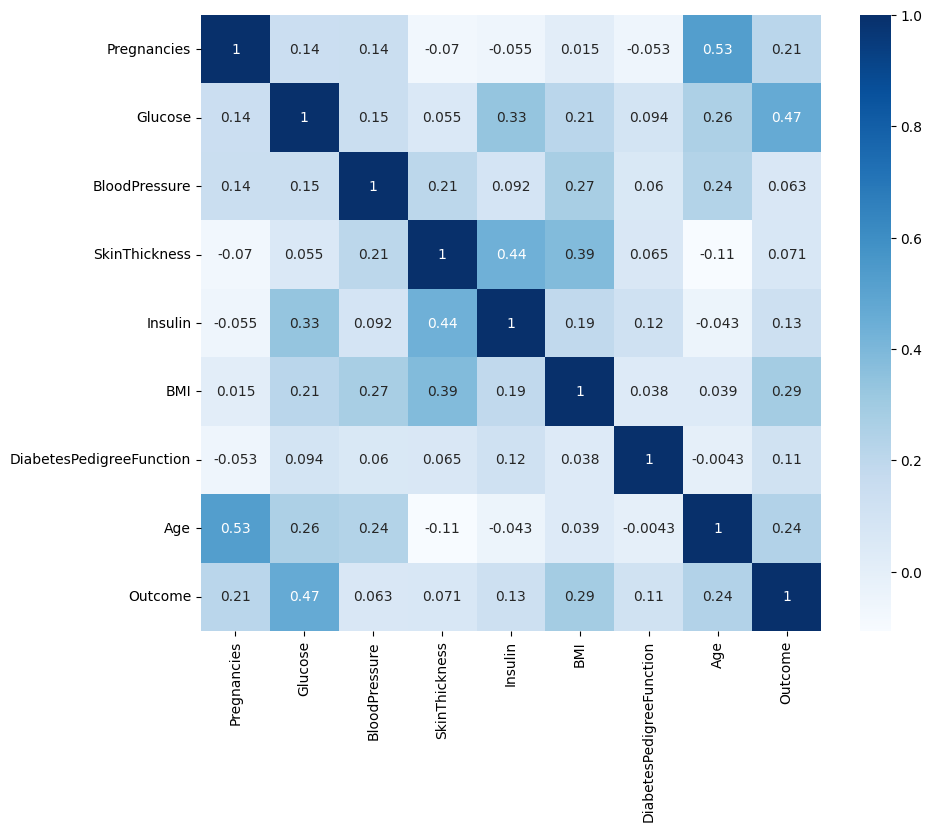

In [ ]:
#Trực quan hóa về bảng tương quan
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

In [ ]:
# Kiểm tra các giá trị Null trong bộ dữ liệu
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#Kiểm tra các dòng có bị trùng hay không
df.duplicated().sum()

0

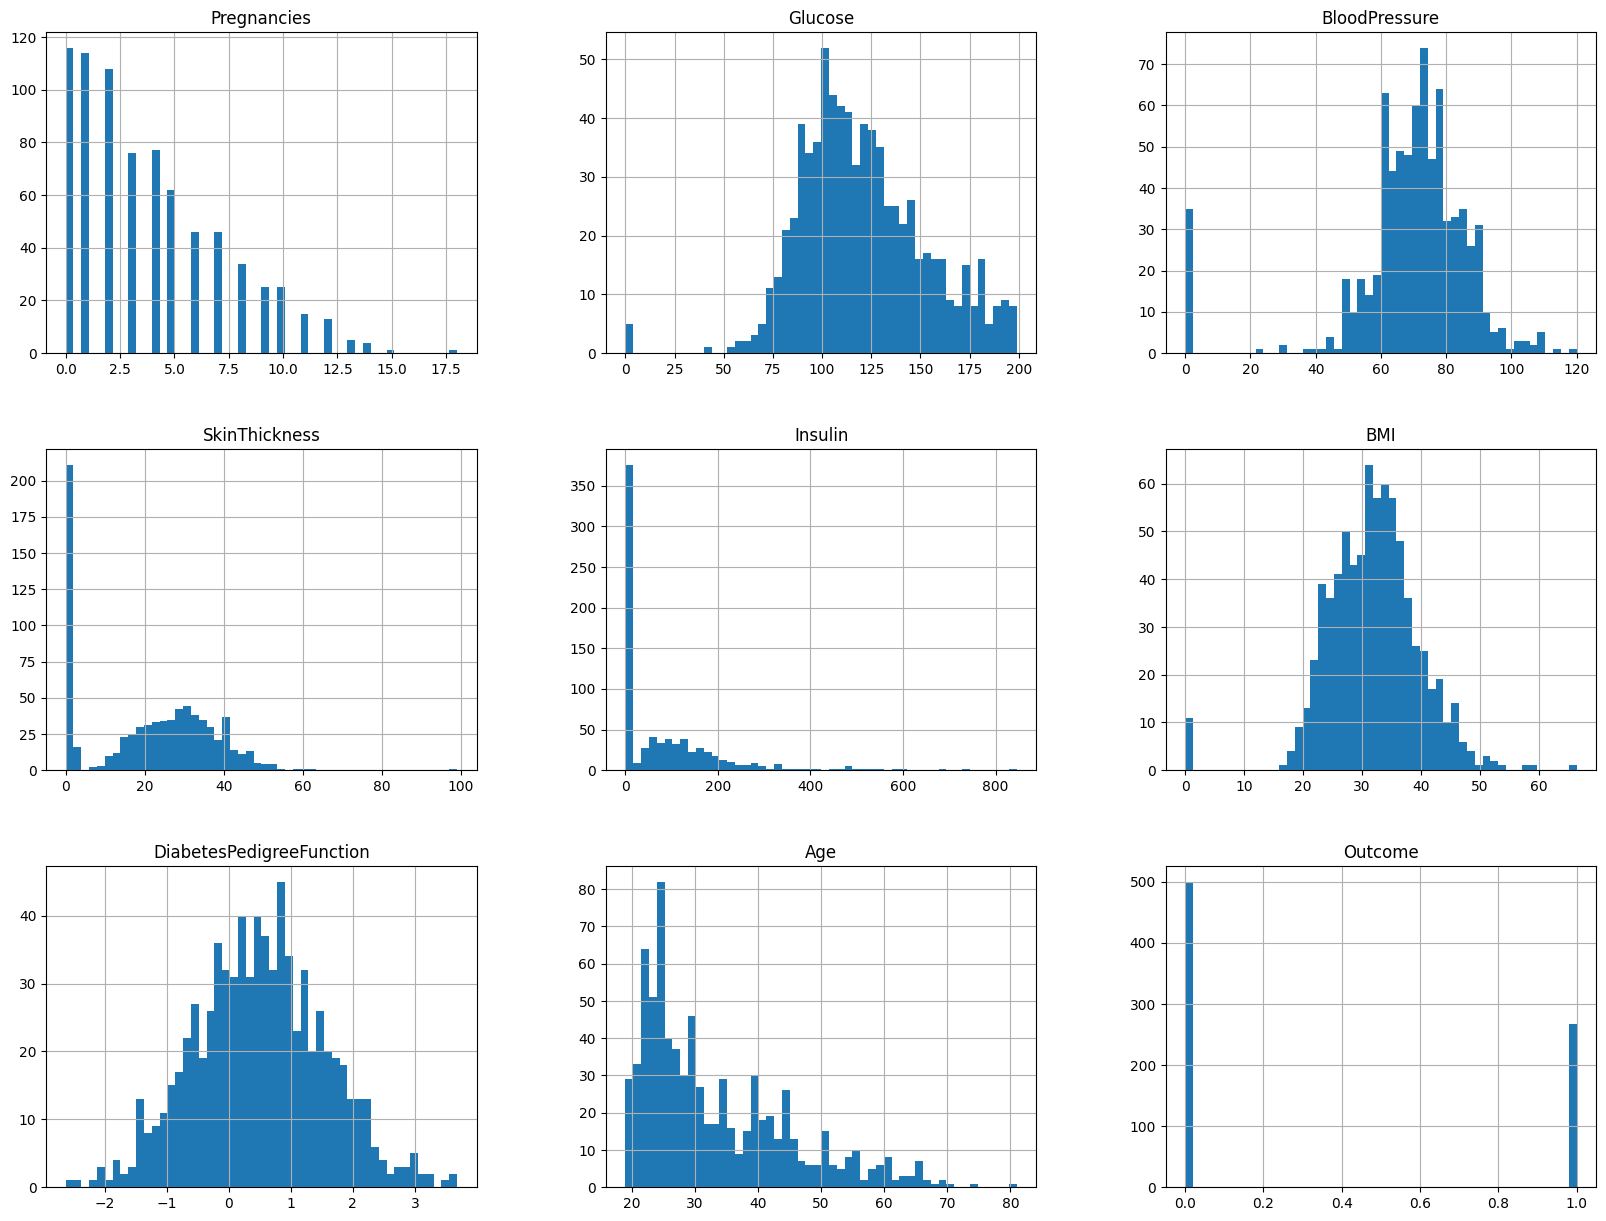

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

[0.10750129 0.23646491 0.09310944 0.08844884 0.09333539 0.1363148
 0.10945693 0.1353684 ]


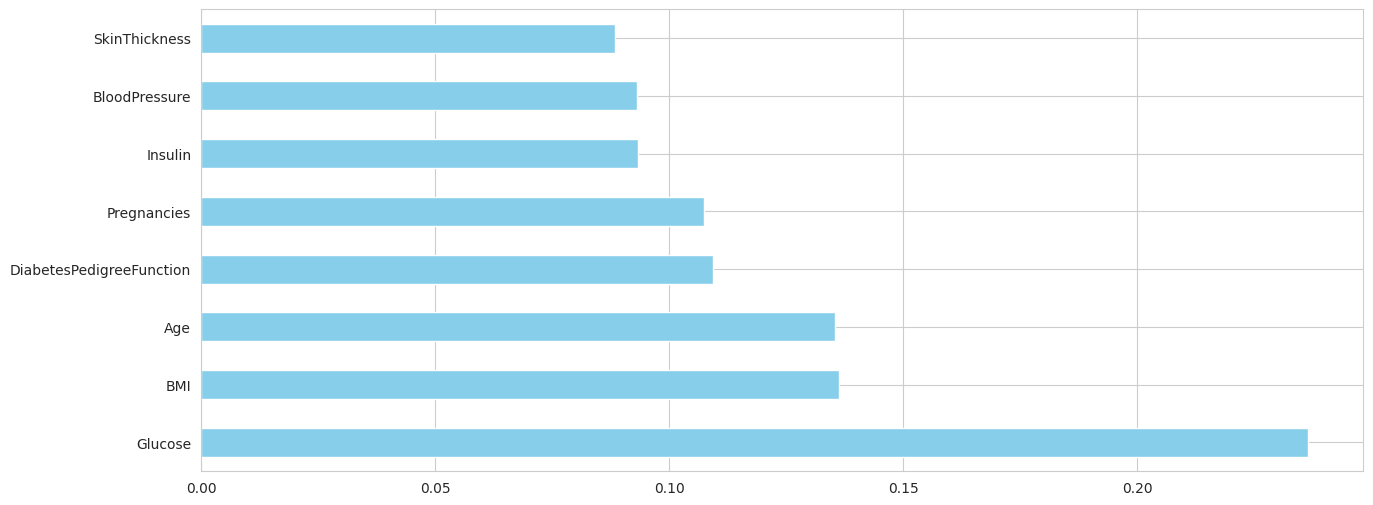

In [ ]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("whitegrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

#Đào tạo mô hình ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

#In ra tầm quan trọng của các đặc trưng
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh', color='skyblue')
plt.show()

In [ ]:
x = df.drop("Outcome", axis=1)
y = df['Outcome']

In [ ]:
print(x.shape)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

(768, 8)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42, stratify = y)

print(f"The Shape of x_train : {x_train.shape}")
print(f"The Shape of x_test : {x_test.shape}")
print(f"The Shape of y_train : {y_train.shape}")
print(f"The Shape of y_test : {y_test.shape}")

The Shape of x_train : (614, 8)
The Shape of x_test : (154, 8)
The Shape of y_train : (614, 1)
The Shape of y_test : (154, 1)


Logestic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78       100
         1.0       0.59      0.44      0.51        54

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154



In [ ]:
mylist = []

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[83 17]
 [30 24]]
0.6948051948051948


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78       100
         1.0       0.59      0.44      0.51        54

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154



K Nearest Neighbor

In [ ]:
kn = KNeighborsClassifier(n_neighbors=6)
kn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = kn.predict(x_test)
print(y_pred)

[1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[87 13]
 [25 29]]
0.7532467532467533


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       100
         1.0       0.69      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



Random Forest Classifcation

In [ ]:
classifier = RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[78 22]
 [16 38]]
0.7532467532467533


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       100
         1.0       0.63      0.70      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



Support Vector Classifier (SVM)

In [ ]:
svm = SVC(C = 0.6, random_state = 42, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=0.6, random_state=42)

In [ ]:
y_pred = svm.predict(x_test)
print(y_pred)

[1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[83 17]
 [26 28]]
0.7207792207792207


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79       100
         1.0       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



DECISION TREE CLASSIFIER

In [ ]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [ ]:
y_predd = classifier.predict(x_test)
y_predd

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0.])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[83 17]
 [26 28]]
0.7207792207792207


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79       100
         1.0       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



Model Evaluation

In [ ]:
# Plotting accuracy score of different models
mylist

[0.6948051948051948,
 0.7532467532467533,
 0.7532467532467533,
 0.7207792207792207,
 0.7207792207792207]

Từ năm phương pháp dự đoán bao gồm: Logistic Regression, K-Nearest Neighbors, Random Forest, Support Vector Classifier, Decision Tree Classifier. Ta có thể thấy được rằng mô hình Logistic Regression là mô hình có độ dự báo sai lệch thấp nhất

In [ ]:
mylist2 = ["Logestic Regression", "KNearestNeighbours", "RandomForest", "SVM","DecisionTreeT"]

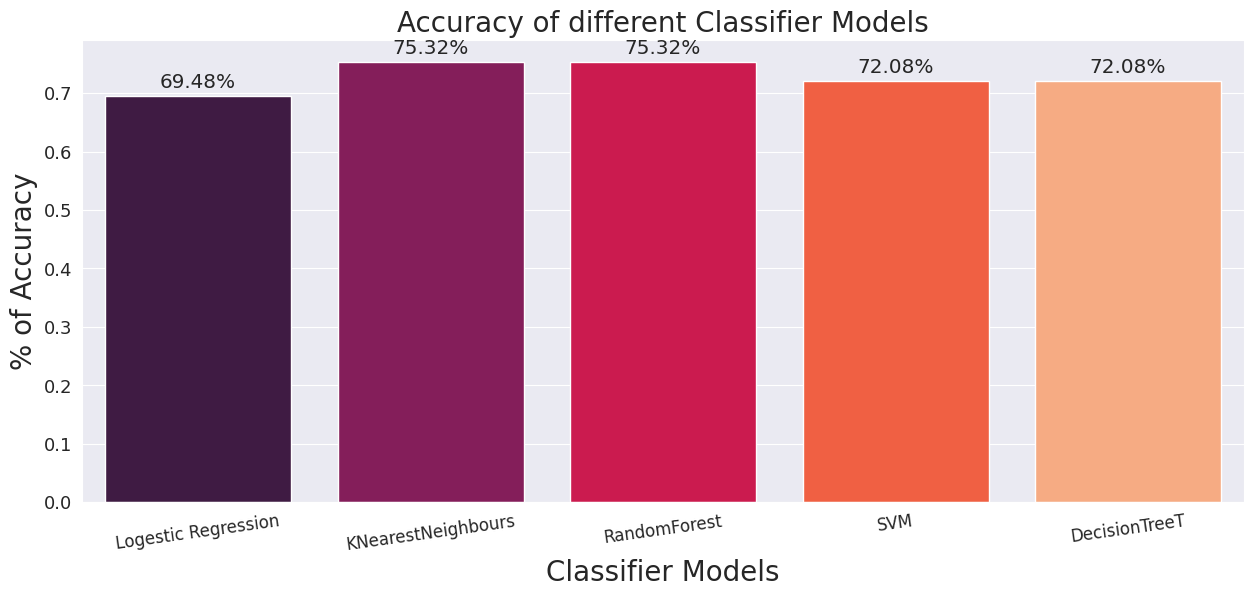

In [ ]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

TRỰC QUAN HOÁ DỮ LIỆU

Trực quan hóa về tuổi

In [ ]:
import plotly.graph_objects as go
# Create the histogram
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df['Age'],
    xbins=dict(
        start=21,
        end=81,
        size=2
    ),
    marker_color='#1f77b4',  # Column color
    opacity=1
))

# Update the layout
fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT',
    bargap=0.05,
    xaxis={'showgrid': False},
    yaxis={'showgrid': False},
    template='plotly_dark',
    plot_bgcolor='black',  # Background color
    paper_bgcolor='black'  # Paper background color
)

fig.show()


Trực quan hóa về tuổi ảnh hưởng tới bệnh tiểu đường

In [ ]:
# Now lets categorize the above histogram byOutcome

import plotly.express as px
fig = px.histogram(df, x="Age", color="Outcome", marginal="violin", hover_data=df.columns,
                   title ="Distribution of AGE Vs Outcome",
                   labels={"Age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

Nhìn vào dữ liệu đã được trực quan hóa, khi số người mắc bệnh ở độ tuổi trung niên (khoảng 20-40 tuổi) là phổ biến nhất, nhưng tỷ lệ mắc bệnh dần giảm khi tuổi tác tăng cao.

Trực quan hóa về Mức đường huyết

In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['Glucose'],
    xbins=dict( # bins used for histogram
        start=0,
        end=199,
        size=15
    ),
    marker_color='#1f77b4',  # Column color
    opacity=1
))

fig.update_layout(
    title_text='GLUCOSE DISTRIBUTION',
    xaxis_title_text='GLUCOSE',
    yaxis_title_text='COUNT',
    bargap=0.05,
    xaxis={'showgrid': False},
    yaxis={'showgrid': False},
    template='plotly_dark',
    plot_bgcolor='black',  # Background color
    paper_bgcolor='black'  # Paper background color
)

fig.show()

Trực quan hóa về Mức đường huyết ảnh hưởng tới bệnh tiểu đường

In [ ]:
# Now lets categorize the above histogram by Outcome

import plotly.express as px
fig = px.histogram(df, x="Glucose", color="Outcome", marginal="violin", hover_data=df.columns,
                   title ="Distribution of CREATININE Glucose Vs Outcome",
                   labels={"Glucose": "Glucose"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

Dựa vào biểu đồ trực quan hóa, ta có thể nhận thấy mối liên hệ rõ ràng giữa nồng độ glucose trong máu và khả năng mắc bệnh tiểu đường. Những người có mức glucose thấp thường ít mắc bệnh, trong khi tỷ lệ mắc bệnh tăng dần ở những người có mức glucose cao. Điều này chứng tỏ rằng lượng glucose trong máu đóng vai trò quan trọng trong việc xác định nguy cơ tiểu đường.

Trực quan hóa về Huyết áp tâm trương

In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['BloodPressure'],
    xbins=dict( # bins used for histogram
        start=0,
        end=199,
        size=15
    ),
    marker_color='#1f77b4',  # Column color
    opacity=1
))

fig.update_layout(
    title_text='BloodPressure DISTRIBUTION',
    xaxis_title_text='BloodPressure',
    yaxis_title_text='COUNT',
    bargap=0.05,
    xaxis={'showgrid': False},
    yaxis={'showgrid': False},
    template='plotly_dark',
    plot_bgcolor='black',  # Background color
    paper_bgcolor='black'  # Paper background color
)

fig.show()

Trực quan hóa về Huyết áp tâm trương ảnh hưởng tới bệnh tiểu đường

In [ ]:
# Now lets categorize the above histogram by Outcome

import plotly.express as px
fig = px.histogram(df, x="BloodPressure", color="Outcome", marginal="violin", hover_data=df.columns,
                   title ="Distribution of CREATININE BloodPressure Vs Outcome",
                   labels={"BloodPressure": "BloodPressure"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

Tương tự, biểu đồ về huyết áp cũng cho thấy sự liên quan với nguy cơ mắc bệnh. Nhóm người có huyết áp nằm trong khoảng 60 đến 80 có tỷ lệ mắc bệnh tiểu đường cao hơn hẳn. Ngược lại, những người có huyết áp rất thấp hoặc rất cao lại có xu hướng ít mắc bệnh hơn. Điều này gợi ý rằng huyết áp cũng là một yếu tố đáng quan tâm trong việc đánh giá rủi ro tiểu đường.

Trực quan hóa về Nồng độ insulin huyết thanh

In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['Insulin'],
    xbins=dict( # bins used for histogram
        start=0,
        end=199,
        size=15
    ),
    marker_color='#1f77b4',  # Column color
    opacity=1
))

fig.update_layout(
    title_text='Insulin DISTRIBUTION',
    xaxis_title_text='Insulin',
    yaxis_title_text='COUNT',
    bargap=0.05,
    xaxis={'showgrid': False},
    yaxis={'showgrid': False},
    template='plotly_dark',
    plot_bgcolor='black',  # Background color
    paper_bgcolor='black'  # Paper background color
)

fig.show()

Trực quan hóa về Nồng độ insulin huyết thanh ảnh hưởng tới bệnh tiểu đường

In [ ]:
# Now lets categorize the above histogram by Outcome

import plotly.express as px
fig = px.histogram(df, x="Insulin", color="Outcome", marginal="violin", hover_data=df.columns,
                   title ="Distribution of CREATININE Insulin Vs Outcome",
                   labels={"Insulin": "Insulin"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

Biểu đồ về insulin cho thấy sự phân bố không đều giữa các bệnh nhân. Đáng chú ý là những bệnh nhân có mức insulin rất thấp thường nằm trong nhóm có nguy cơ mắc bệnh cao hơn. Điều này ám chỉ rằng nồng độ insulin có thể là một yếu tố then chốt để xác định khả năng mắc bệnh tiểu đường.

Trực quan hóa về Chỉ số khối cơ thể(BMI)


In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['BMI'],
    xbins=dict( # bins used for histogram
        start=0,
        end=199,
        size=15
    ),
    marker_color='#1f77b4',  # Column color
    opacity=1
))

fig.update_layout(
    title_text='BMI DISTRIBUTION',
    xaxis_title_text='BMI',
    yaxis_title_text='COUNT',
    bargap=0.05,
    xaxis={'showgrid': False},
    yaxis={'showgrid': False},
    template='plotly_dark',
    plot_bgcolor='black',  # Background color
    paper_bgcolor='black'  # Paper background color
)

fig.show()

Trực quan hóa về Chỉ số khối cơ thể(BMI) ảnh hưởng tới bệnh tiểu đường

In [ ]:
# Now lets categorize the above histogram by Outcome

import plotly.express as px
fig = px.histogram(df, x="BMI", color="Outcome", marginal="violin", hover_data=df.columns,
                   title ="Distribution of CREATININE BMI Vs Outcome",
                   labels={"BMI": "BMI"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

Cuối cùng, khi xem xét chỉ số BMI, biểu đồ cho thấy chỉ số này có ảnh hưởng lớn đến khả năng mắc bệnh. Đặc biệt, những người có BMI từ 30 đến 40 chiếm tỷ lệ cao trong nhóm mắc bệnh tiểu đường, nhấn mạnh mối quan hệ giữa cân nặng và nguy cơ phát triển bệnh tiểu đường.